# King County Housing Data

Using the King County Housing data, I'm going to determine what factors contribute  to predicting property value by building a multiple lenear regression model.

## Importing relavent libraries and inspecting data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Importing King County Housing Data

In [2]:
housing_df = pd.read_csv('kc_house_data.csv')
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


* id - unique identified for a house
* date - date house was sold
* price - price house was sold
* bedrooms - number of bedrooms
* sqft_living - square footage of the home
* sqft_lot - square footage of the lot
* floors - floors (levels) in the house
* waterfront - house with a view of the waterfront
* view - quality of view from the house
* condition - the condition of the home overall
* grade - overall grade of the home based on King County grading system
* sqft_above - square footage of the house apart from the basement
* sqft_basement - square footage of the basement
* yr_built - built year
* yr_renovated - Year when house was renovated
* zipcode - zipcode
* lat - latitudal coordinate
* long - longitudinal coordinate
* sqft_living15 - The square footage of the interior living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

Let's get some more info on our dataframe.

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

OK... we can see that six attributes are strings and "waterfront," "view," and "yr_renovated" have null values. We'll address these soon. For now, let's get some statistical understanding of each attribute.

In [4]:
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

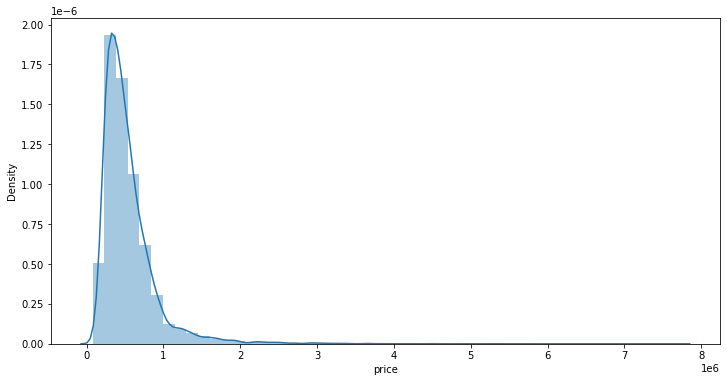

In [5]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

plt.figure(figsize=(12,6))
sns.distplot(housing_df['price'])

Most of the houses are under 2,000,000 USD with an average price of 540,000 USD. The highest priced home is 7,700,000 USD and the lowest priced home is 78,000 USD.

In [6]:
print("Skewness: %f" % housing_df['price'].skew())
print("Kurtosis: %f" % housing_df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


We can also see that price has a positive skewness and deviates from the normal distribution. The skewness and kurtosis are pretty high so we'll need to fix that.

## Let's clean up this data

For now, since 'id' isn't going to have any relevance to our analysis, let's drop this column first.

In [7]:
housing_df.drop(['id'], axis=1, inplace=True)
housing_df.reset_index(inplace=True, drop=True)

### Null values... what's going on?

We already know 'waterfront,' 'view,' and 'yr_renovated' have null values... let's find out just how much.

In [8]:
housing_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We'll calculate the percentage of null values from the total attributes to see how significantly it effects our data.

In [9]:
total = 21597
null_sum = 2376+63+3842
percent_null = null_sum/total
percent_null

0.29082742973561143

29%. That's too high to drop these records so let's dive deaper and see what's going on.

Waterfront: 2376... makes sense. Not every property is going to have a waterfront view. Let's start here by seeing if the waterfront properties are indeed on the water.

In [10]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [11]:
waterfront = housing_df[(housing_df['waterfront'] == "YES")]

waterfront_map = folium.Map(location=[waterfront.lat.mean(), waterfront.long.mean()],
                           zoom_start=11,
                           tiles='openstreetmap')
for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)

waterfront_map

Check it out! They are on the water. Let's just add the price and sqft_living as popup markers.

In [12]:
for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    price = waterfront.price[i]
    sqft_living = waterfront.sqft_living[i]
    marker=folium.Marker([lat, long]).add_to(waterfront_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)
    
waterfront_map

In [13]:
len(waterfront)

146

I've been clicking on all the houses on the waterfront and can see they have a higher price than the mean.  

Let's do the same with view.

In [14]:
view_origin = housing_df['view']
origin_series = pd.Series(view_origin)
cat_origin = origin_series.astype('category')
cat_origin

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
         ... 
21592    NONE
21593    NONE
21594    NONE
21595    NONE
21596    NONE
Name: view, Length: 21597, dtype: category
Categories (5, object): ['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

In [15]:
view = housing_df[(housing_df['view'] == "EXCELLENT")]
view_map = folium.Map(location=[view.lat.mean(), view.long.mean()],
                           zoom_start=11,
                           tiles='openstreetmap')
for i in view.index:
    lat = view.lat[i]
    long = view.long[i]
    price = view.price[i]
    sqft_living = view.sqft_living[i]
    marker=folium.Marker([lat, long]).add_to(view_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(view_map)
    
view_map

In [16]:
len(view)

317

Same thing here. And there's some very clear overlap. Let's make a heatmap to via matplotlib to see if we notice these view/waterfront locations to see if they have higher market value.

In [17]:
#Make a new column for 'price' in duplicate df with 7 bins
df = housing_df

df['price_bins'] = df.price.map(lambda x: 1 if x >= 1 and x <= 250000
                               else (2 if x > 250000 and x <= 500000
                                    else (3 if x > 500000 and x <= 750000
                                         else (4 if x > 750000 and x <= 1000000
                                              else (5 if x > 1000000 and x <= 2000000
                                                   else (6 if x > 2000000 and x <= 4000000
                                                        else 7))))))
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_bins
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,3
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,3
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3


I want to create a heatmap overlayed on the property parcel map of King County so I'll have to create bins that store the homes by price value groups.

In [18]:
# houses by price

lat1 = df.loc[df['price_bins'] == 1].lat
long1 = df.loc[df['price_bins'] == 1].long

lat2 = df.loc[df['price_bins'] == 2].lat
lat2 = df.loc[df['price_bins'] == 2].long

lat3 = df.loc[df['price_bins'] == 3].lat
lat3 = df.loc[df['price_bins'] == 3].long

lat4 = df.loc[df['price_bins'] == 4].lat
lat4 = df.loc[df['price_bins'] == 4].long

lat5 = df.loc[df['price_bins'] == 5].lat
lat5 = df.loc[df['price_bins'] == 5].long

lat6 = df.loc[df['price_bins'] == 6].lat
lat6 = df.loc[df['price_bins'] == 6].long

lat7 = df.loc[df['price_bins'] == 7].lat
lat7 = df.loc[df['price_bins'] == 7].long

In [19]:
# import necessary packages

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# create basemap

basemap = gpd.read_file('Parcels_for_King_County_with_Address_with_Property_Information___parcel_address_area.shp')

In [20]:
crs = {'init' : 'epsg:4326'}

# using lat and long for geometry
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geometry[:3]

# creating a dataframe with a new column for geometry points
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

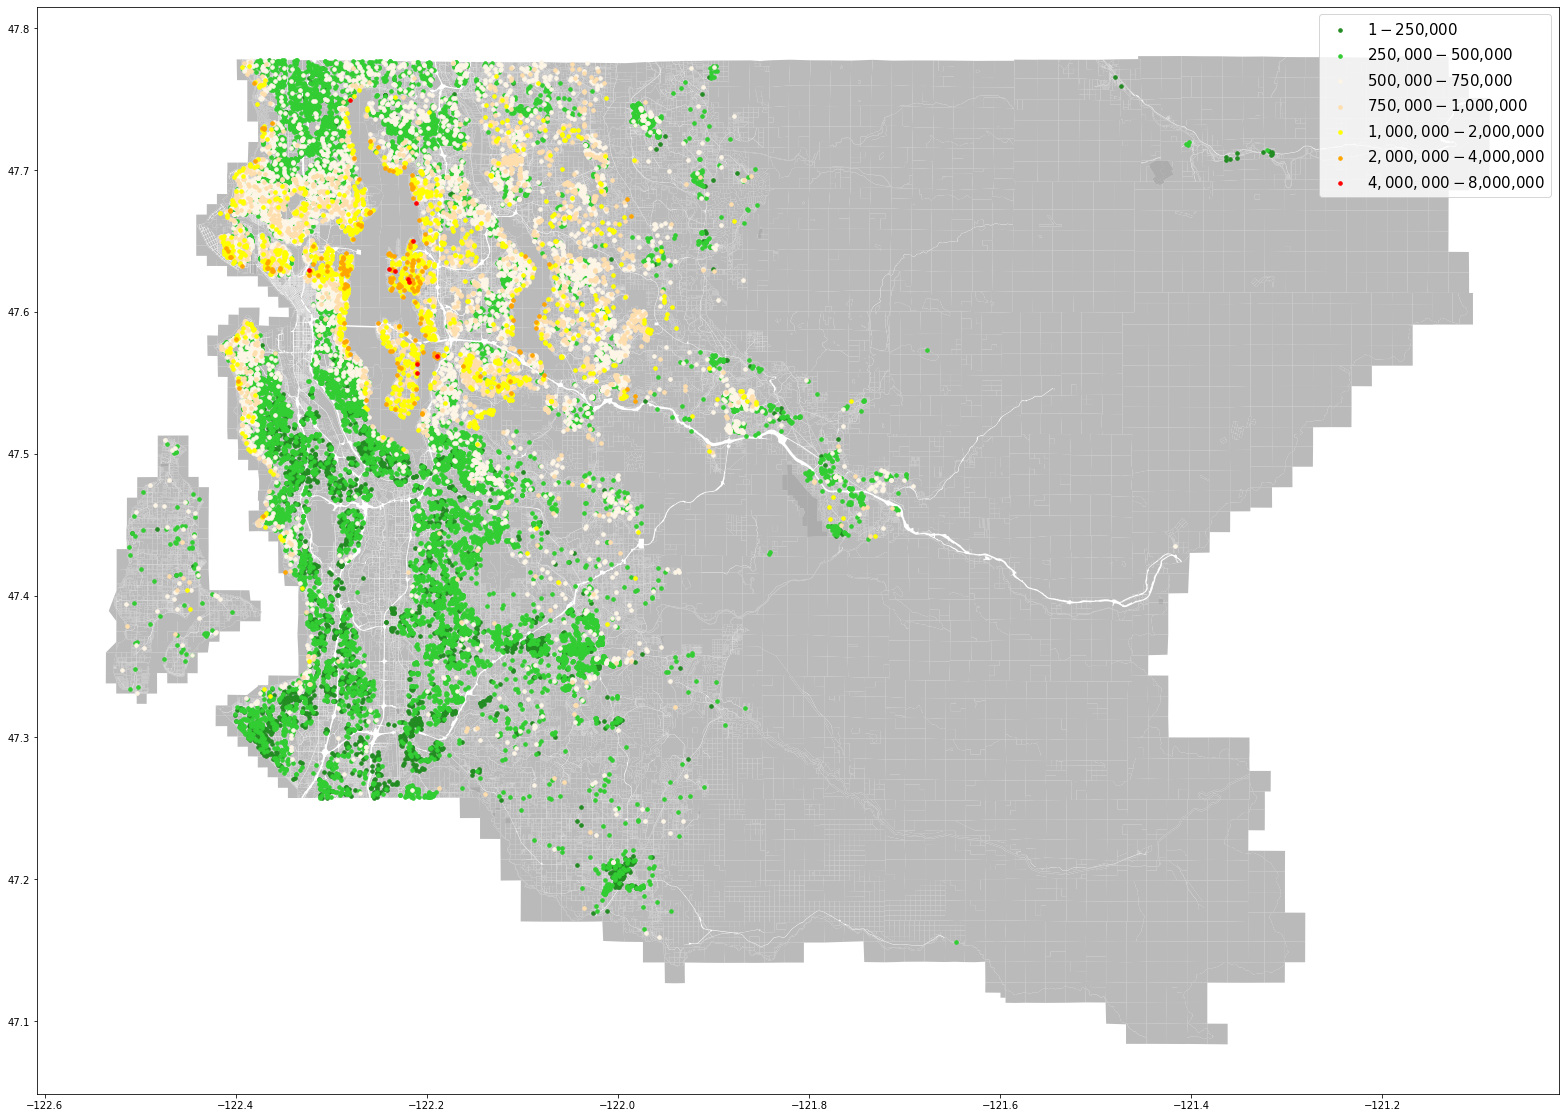

In [21]:
# plotting basemap with 7 price ranges

fig, ax = plt.subplots(figsize=(40,20))
basemap.plot(ax = ax, alpha = 0.8, color = 'darkgrey')

geo_df[geo_df['price_bins'] == 1].plot(ax=ax, markersize = 50, color = 'forestgreen', marker = '.', label = '$1 - $250,000')
geo_df[geo_df['price_bins'] == 2].plot(ax=ax, markersize = 50, color = 'limegreen', marker = '.', label = '$250,000 - $500,000')
geo_df[geo_df['price_bins'] == 3].plot(ax=ax, markersize = 50, color = 'oldlace', marker = '.', label = '$500,000 - $750,000')
geo_df[geo_df['price_bins'] == 4].plot(ax=ax, markersize = 50, color = 'navajowhite', marker = '.', label = '$750,000 - $1,000,000')
geo_df[geo_df['price_bins'] == 5].plot(ax=ax, markersize = 50, color = 'yellow', marker = '.', label = '$1,000,000 - $2,000,000')
geo_df[geo_df['price_bins'] == 6].plot(ax=ax, markersize = 50, color = 'orange', marker = '.', label = '$2,000,000 - $4,000,000')
geo_df[geo_df['price_bins'] == 7].plot(ax=ax, markersize = 50, color = 'red', marker = '.', label = '$4,000,000 - $8,000,000')

plt.legend(prop={'size':15})

It's cool to see how as we get closer to the metropolis of Seattle Tacoma, and even Belleview the properties get more pricy. It's also clear that the highest valued homes are on the water or have a nice view. This visualization might be more useful if we had the data for price values over a 10, 20, 30 year period so we could track the property growth trends by neighborhood over time. 

Let's go back to our original data and replace the null values for "waterfront" with 0.

In [22]:
# for waterfront, 0 means no waterfront view.
values = {'waterfront':0}
housing_df.fillna(value=values, inplace=True)

In [23]:
housing_df.waterfront[housing_df.waterfront == 'NO'] = 0
housing_df.waterfront[housing_df.waterfront == 'YES'] = 1
housing_df['waterfront'].describe()

C:\Users\jonla\AppData\Local\Temp\ipykernel_11460\1160172365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.waterfront[housing_df.waterfront == 'NO'] = 0
C:\Users\jonla\AppData\Local\Temp\ipykernel_11460\1160172365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.waterfront[housing_df.waterfront == 'YES'] = 1


count     21597
unique        2
top           0
freq      21451
Name: waterfront, dtype: int64

In [24]:
housing_df['waterfront'] = housing_df['waterfront'].astype(str).astype(int)

In [25]:
housing_df['waterfront'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: waterfront
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


Because there's such an overlap of view and waterfront, I'll just drop view from our data.

In [26]:
housing_df.drop('view', axis = 1, inplace=True)

Since we're done with the map, we'll drop 'lat', 'long', 'price_bins', 'geometry' and 'zipcode'. 

In [27]:
housing_df.drop(columns = ['price_bins', 'lat', 'long', 'geometry', 'zipcode'], inplace=True)

In [28]:
housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,Average,7 Average,1180,0.0,1955,0.0,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,Average,7 Average,2170,400.0,1951,1991.0,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,Average,6 Low Average,770,0.0,1933,NaN,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,Very Good,7 Average,1050,910.0,1965,0.0,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,Average,8 Good,1680,0.0,1987,0.0,1800,7503


Grade has a string value we need to separate. 

In [29]:
housing_df = housing_df.assign(grade = lambda x: x['grade'].str.extract('(\d+)'))

In [30]:
housing_df['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: object

The dtype for 'grade is still an object. We'll need to convert it to an int32.

In [31]:
housing_df['grade'] = housing_df['grade'].astype(str).astype(int)
housing_df['grade'].head()

0    7
1    7
2    6
3    7
4    8
Name: grade, dtype: int32

In [32]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int32  
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(4), int32(2), int64(7), object(3)
memory usage: 2.5+ MB


In [33]:
housing_df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [34]:
housing_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

In [35]:
date = housing_df['date'].str.split('/', expand=True)
housing_df['month_sold'] = date[0].astype('float64')
housing_df['year_sold'] = date[2].astype('float64')

#Drop original date column
housing_df.drop(columns=['date'], axis = 1, inplace=True)

In [36]:
housing_df['age'] = 2015 - housing_df.yr_built
housing_df = housing_df.drop(columns = ['yr_built'], axis =1)

In [37]:
#fill missing values
housing_df.yr_renovated.fillna(0.0, inplace = True)

#create renovated column
housing_df['renovated'] = housing_df.year_sold - housing_df.yr_renovated

#replace any values less than 10 with 1, and any values over 10 with 0
renovated = housing_df.renovated.values
age = housing_df.age.values
values = np.where(renovated <= 10, 1, 0)
housing_df['renovated'] = np.where(age <= 5, 1, values)

#Drop yr_renovated column
housing_df.drop(columns = ['yr_renovated'], axis = 1, inplace =True)

In [38]:
housing_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

In [39]:
housing_df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [40]:
housing_df.condition[housing_df.condition == 'Poor'] = 1
housing_df.condition[housing_df.condition == 'Fair'] = 2
housing_df.condition[housing_df.condition == 'Average'] = 3
housing_df.condition[housing_df.condition == 'Good'] = 4
housing_df.condition[housing_df.condition == 'Very Good'] = 5
housing_df['condition'].unique()

C:\Users\jonla\AppData\Local\Temp\ipykernel_11460\993500315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.condition[housing_df.condition == 'Poor'] = 1
C:\Users\jonla\AppData\Local\Temp\ipykernel_11460\993500315.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.condition[housing_df.condition == 'Fair'] = 2
C:\Users\jonla\AppData\Local\Temp\ipykernel_11460\993500315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

array([3, 5, 4, 1, 2], dtype=object)

In [41]:
housing_df['condition'] = housing_df['condition'].astype(str).astype(int)
housing_df['condition'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: condition
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


In [42]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   condition      21597 non-null  int32  
 8   grade          21597 non-null  int32  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  sqft_living15  21597 non-null  int64  
 12  sqft_lot15     21597 non-null  int64  
 13  month_sold     21597 non-null  float64
 14  year_sold      21597 non-null  float64
 15  age            21597 non-null  int64  
 16  renovated      21597 non-null  int32  
dtypes: float64(5), int32(4), int64(7), object(1)
memor

In [43]:
housing_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [44]:
housing_df.sqft_basement[housing_df.sqft_basement == '?'] = 0

C:\Users\jonla\AppData\Local\Temp\ipykernel_11460\501120036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df.sqft_basement[housing_df.sqft_basement == '?'] = 0


In [45]:
housing_df['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype 
--------------  ----- 
21597 non-null  object
dtypes: object(1)
memory usage: 168.9+ KB


In [48]:
housing_df['sqft_basement'] = housing_df['sqft_basement'].str.replace('.0', '')
housing_df['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype 
--------------  ----- 
21143 non-null  object
dtypes: object(1)
memory usage: 168.9+ KB


In [49]:
values = {'sqft_basement':0}
housing_df.fillna(value=values, inplace=True)

In [51]:
housing_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

In [52]:
housing_df['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype 
--------------  ----- 
21597 non-null  object
dtypes: object(1)
memory usage: 168.9+ KB


In [55]:
housing_df['sqft_basement'].unique()

array(['0', '9', '15', 0, '7', '10', '8', '3', '16', '588', '4', '5', '',
       '2', '265', '14', '6', '12', '1', '11', '13', '19', '18', '475',
       '935', '17', '21', '23', '1284', '25', '20', '24', '1481', '1135',
       '243', '1798', '1852', '875', '28', '145', '784', '374', '518',
       '27', '34', '48', '1913', '32', '415', '652', '2196', '515',
       '1548', '235', '861', '22', '792', '41', '768', '435', '08', '26',
       '666', '30', '172', '1816', '1245', '1525', '862', '946', '1281',
       '414', '276', '1248', '516', '176', '225', '1275', '266', '283',
       '65', '295', '915', '556', '417', '143', '274', '248'],
      dtype=object)

In [60]:
housing_df['sqft_basement'] = housing_df['sqft_basement'].mask(housing_df['sqft_basement']== '')
housing_df['sqft_basement'].unique()

array(['0', '9', '15', 0, '7', '10', '8', '3', '16', '588', '4', '5', nan,
       '2', '265', '14', '6', '12', '1', '11', '13', '19', '18', '475',
       '935', '17', '21', '23', '1284', '25', '20', '24', '1481', '1135',
       '243', '1798', '1852', '875', '28', '145', '784', '374', '518',
       '27', '34', '48', '1913', '32', '415', '652', '2196', '515',
       '1548', '235', '861', '22', '792', '41', '768', '435', '08', '26',
       '666', '30', '172', '1816', '1245', '1525', '862', '946', '1281',
       '414', '276', '1248', '516', '176', '225', '1275', '266', '283',
       '65', '295', '915', '556', '417', '143', '274', '248'],
      dtype=object)

In [61]:
values = {'sqft_basement':0}
housing_df.fillna(value=values, inplace=True)

In [62]:
housing_df['sqft_basement'] = housing_df['sqft_basement'].astype(str).astype(int)

In [63]:
housing_df['sqft_basement'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: sqft_basement
Non-Null Count  Dtype
--------------  -----
21597 non-null  int32
dtypes: int32(1)
memory usage: 84.5 KB


In [69]:
# Normalizing the data

In [64]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age', 'renovated']:
    housing_df[feat] = norm_feat(housing_df[feat])
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,5.402966e+05,-1.580560e-15,-2.207430e-15,-1.857928e-16,2.098202e-16,-1.925871e-14,-1.361026e-15,2.583457e-15,1.586436e-14,9.608362e-17,-1.342605e-17,-1.936580e-16,-1.840605e-16,1.593391e-16,1.187230e-13,-3.060333e-15,-1.863527e-14
std,3.673681e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,7.800000e+04,-2.562024e+00,-2.101247e+00,-1.862880e+00,-3.520522e-01,-9.155311e-01,-8.249784e-02,-3.704314e+00,-3.970267e+00,-1.713778e+00,-8.447713e-02,-2.316914e+00,-4.439058e-01,-1.789361e+00,-6.906510e-01,-1.497871e+00,-2.755347e-01
25%,3.220000e+05,-4.028937e-01,-4.757266e-01,-7.083297e-01,-2.429067e-01,-9.155311e-01,-8.249784e-02,-6.299719e-01,-5.607873e-01,-7.231529e-01,-8.447713e-02,-7.247493e-01,-2.807861e-01,-8.262979e-01,-6.906510e-01,-8.851104e-01,-2.755347e-01
50%,4.500000e+05,-4.028937e-01,1.744818e-01,-1.855143e-01,-1.806552e-01,1.093901e-02,-8.249784e-02,-6.299719e-01,-5.607873e-01,-2.761633e-01,-8.447713e-02,-2.139723e-01,-1.883919e-01,-1.842560e-01,-6.906510e-01,-1.361802e-01,-2.755347e-01
75%,6.450000e+05,6.766715e-01,4.995859e-01,5.115728e-01,-1.065957e-01,9.374092e-01,-8.249784e-02,9.071993e-01,2.915825e-01,5.090887e-01,-1.983754e-02,5.448965e-01,-9.808756e-02,7.788070e-01,1.447842e+00,6.808346e-01,-2.755347e-01
max,7.700000e+06,3.198406e+01,7.651878e+00,1.248187e+01,3.951112e+01,3.716820e+00,1.212097e+01,2.444371e+00,4.553432e+00,9.207265e+00,4.723171e+01,6.163444e+00,3.147422e+01,1.741870e+00,1.447842e+00,2.416991e+00,3.629139e+00


In [65]:
housing_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age',
       'renovated'],
      dtype='object')

In [66]:
housing_df.to_csv("housing_df_cleaned.csv", index=False)

## EDA

<AxesSubplot:>

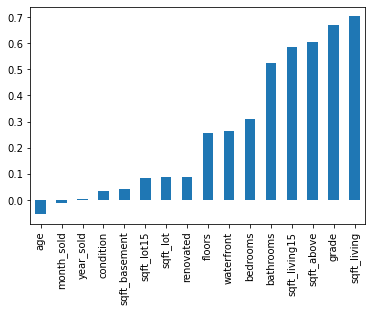

In [67]:
housing_df.corr()['price'].sort_values().drop('price').plot(kind='bar')

We can see that price is most directly correlated to sqft_living. It's least correlated to yr_built. Let's explore more with a correlation matrix.

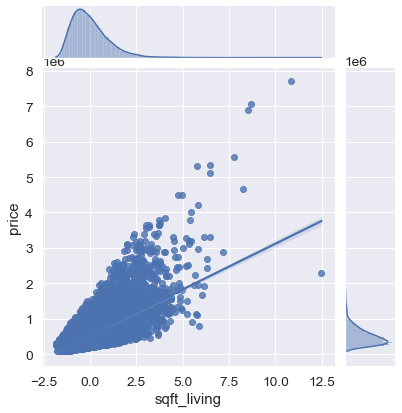

In [74]:
sns.jointplot('sqft_living','price', data=housing_df, kind='reg');

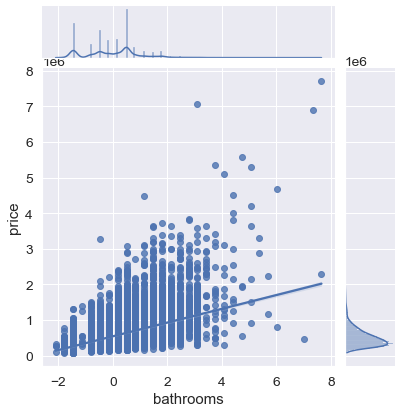

In [75]:
sns.jointplot('bathrooms','price', data=housing_df, kind='reg');

#### Checking for Multicollinearity

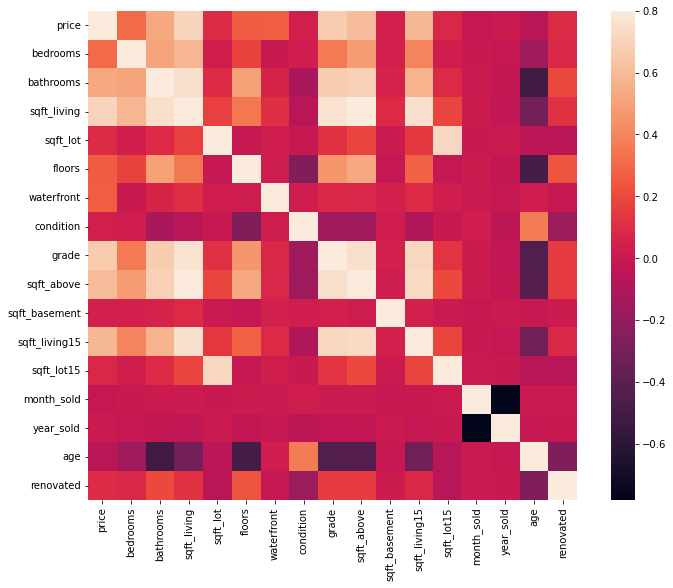

In [68]:
corrmat = housing_df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square=True);

There's clearly some correlation. We'll take a closer look.

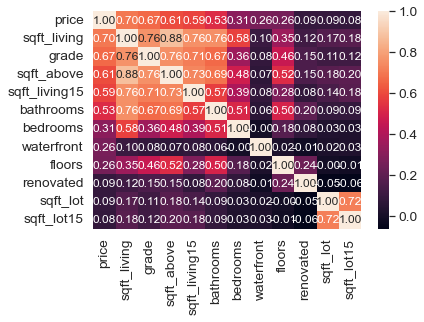

In [71]:
# price correlation matrix
k = 12 # number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(housing_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

We can see that sqft_living, grade, sqft_above, and sqft_living15 have the highest correlation to price. Bathrooms have a noticible correlation as well. 

In [33]:
# build baselinne model from sqft_living 
# r-squared
# normality of residuals
#build another model by adding more features
# 4-5
# check assumptions
# if assumptions are still not met do log transform annd build final model.

# Interpret coefficients ** Model should be with stats models

In [77]:
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

In [78]:
df = pd.read_csv('housing_df_cleaned.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
0,221900.0,-0.402894,-1.451039,-0.980629,-0.228177,-0.915531,-0.082498,-0.629972,-0.560787,-0.735234,-0.084477,-0.943654,-0.260621,1.099828,-0.690651,0.544665,-0.275535
1,538000.0,-0.402894,0.174482,0.533357,-0.189735,0.937409,-0.082498,-0.629972,-0.560787,0.460766,-0.084477,-0.432877,-0.187695,1.741870,-0.690651,0.680835,-0.275535
2,180000.0,-1.482459,-1.451039,-1.427201,-0.123137,-0.915531,-0.082498,-0.629972,-1.413157,-1.230546,-0.084477,1.070267,-0.172186,-1.468340,1.447842,1.293596,-0.275535
3,604000.0,0.676671,1.149794,-0.131054,-0.243873,-0.915531,-0.082498,2.444371,-0.560787,-0.892284,0.109442,-0.914467,-0.284453,1.741870,-0.690651,0.204243,-0.275535
4,510000.0,-0.402894,-0.150622,-0.436030,-0.169499,-0.915531,-0.082498,-0.629972,0.291583,-0.131194,-0.084477,-0.272347,-0.192682,-1.468340,1.447842,-0.544688,-0.275535


In [79]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'month_sold',
 'year_sold',
 'age',
 'renovated']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  float64
 8   grade          21597 non-null  float64
 9   sqft_above     21597 non-null  float64
 10  sqft_basement  21597 non-null  float64
 11  sqft_living15  21597 non-null  float64
 12  sqft_lot15     21597 non-null  float64
 13  month_sold     21597 non-null  float64
 14  year_sold      21597 non-null  float64
 15  age            21597 non-null  float64
 16  renovated      21597 non-null  float64
dtypes: float64(17)
memory usage: 2.8 MB


In [81]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [83]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2527.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:38:44   Log-Likelihood:            -2.9599e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21580   BIC:                         5.922e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.403e+05   1475.120    366.273      0.000    5.37e+05    5.43e+05
bedrooms      -4.029e+04   1885.361    -21.370      0.000    -4.4e+04   -3.66e+04
bathrooms      3.644e+04   2683.666     13.580      0.000    3.12e+04    4.17e+04
sqft_living    1.687e+05   4285.321     39.368      0.000     1.6e+05    1.77e+05
sqft_lot       1482.3877   2130.061      0.696      0.486   -2692.690    5657.465
floors         1.479e+04   2056.290      7.191      0.000    1.08e+04    1.88e+04
waterfront     6.208e+04   1493.119     41.579      0.000    5.92e+04     6.5e+04
condition      1.458e+04   1615.028      9.029      0.000    1.14e+04    1.77e+04
grade          1.465e+05   2647.394     55.319      0.000    1.41e+05    1.52e+05
sqft_above    -2.022e+04   3731.513     -5.419      0.000   -2.75e+04   -1.29e+04
sqft_basement -9146.3268   1493.196     -6.125      0.000   -1.21e+04   -6219.553
sqft_living15  2.403e+04   2454.678      9.788      0.000    1.92e+04    2.88e+04
sqft_lot15    -1.431e+04   2146.867     -6.666      0.000   -1.85e+04   -1.01e+04
month_sold     3269.3518   2370.426      1.379      0.168   -1376.858    7915.562
year_sold      1.572e+04   2373.961      6.622      0.000    1.11e+04    2.04e+04
age            1.153e+05   1986.102     58.057      0.000    1.11e+05    1.19e+05
renovated      1.823e+04   1555.993     11.719      0.000    1.52e+04    2.13e+04
==============================================================================
Omnibus:                    16464.304   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1197307.878
Skew:                           3.076   Prob(JB):                         0.00
Kurtosis:                      38.954   Cond. No.                         8.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#remove the uninfluential features
#subset pvalues result to only those less than 0.5
low_pvalues = model.pvalues[model.pvalues < 0.05]

#"intercept" may be low p-value but is not a valid column for the formula
low_pvalues.drop("Intercept", axis=0, errors="ignore", inplace=True)
low_pvalues

bedrooms         2.769179e-100
bathrooms         7.837592e-42
sqft_living       0.000000e+00
floors            6.658890e-13
waterfront        0.000000e+00
condition         1.867833e-19
grade             0.000000e+00
sqft_above        6.066534e-08
sqft_basement     9.205742e-10
sqft_living15     1.411428e-22
sqft_lot15        2.695202e-11
year_sold         3.617616e-11
age               0.000000e+00
renovated         1.275441e-31
dtype: float64

In [85]:
x_cols = low_pvalues.index.values
x_cols

array(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'year_sold', 'age', 'renovated'],
      dtype=object)

In [87]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     2888.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:43:34   Log-Likelihood:            -2.9599e+05
No. Observations:               21597   AIC:                         5.920e+05
Df Residuals:                   21582   BIC:                         5.921e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.403e+05   1475.134    366.270      0.000    5.37e+05    5.43e+05
bedrooms      -4.033e+04   1884.707    -21.401      0.000    -4.4e+04   -3.66e+04
bathrooms      3.641e+04   2683.437     13.570      0.000    3.12e+04    4.17e+04
sqft_living    1.688e+05   4284.629     39.397      0.000     1.6e+05    1.77e+05
floors         1.474e+04   2055.122      7.174      0.000    1.07e+04    1.88e+04
waterfront     6.209e+04   1493.024     41.588      0.000    5.92e+04     6.5e+04
condition      1.452e+04   1614.488      8.992      0.000    1.14e+04    1.77e+04
grade          1.464e+05   2647.112     55.309      0.000    1.41e+05    1.52e+05
sqft_above    -2.008e+04   3727.353     -5.388      0.000   -2.74e+04   -1.28e+04
sqft_basement -9146.7630   1493.209     -6.126      0.000   -1.21e+04   -6219.964
sqft_living15   2.39e+04   2451.530      9.749      0.000    1.91e+04    2.87e+04
sqft_lot15    -1.325e+04   1533.795     -8.638      0.000   -1.63e+04   -1.02e+04
year_sold      1.317e+04   1478.377      8.908      0.000    1.03e+04    1.61e+04
age            1.153e+05   1985.982     58.068      0.000    1.11e+05    1.19e+05
renovated      1.822e+04   1555.626     11.715      0.000    1.52e+04    2.13e+04
==============================================================================
Omnibus:                    16459.942   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195894.113
Skew:                           3.075   Prob(JB):                         0.00
Kurtosis:                      38.932   Cond. No.                         8.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
most_correlated_feature = 'sqft_living'

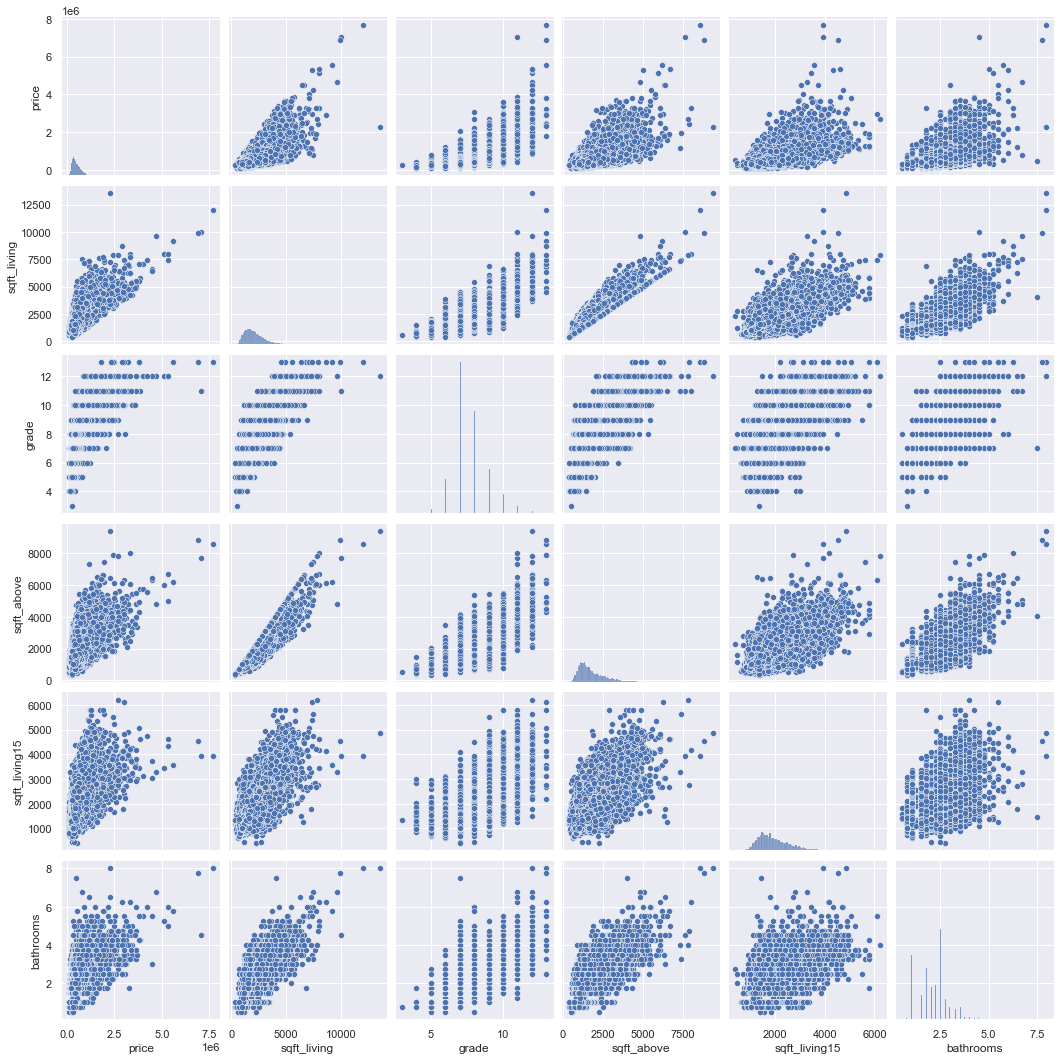

In [35]:
# scatterplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
sns.pairplot(housing_df[cols], height = 2.5)
plt.show()

In [36]:
outcome1 = 'price'
X_cols1 = 
y_train = housing_df['price']

SyntaxError: invalid syntax (352035564.py, line 2)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel('price')
ax.set_title("Most Correlated Feature vs. Price");

In [ ]:
baseline_model = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator = baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True
    cv=splitter
)

print('Train score:    ', baseline_scores['train_score'].mean())
print('Validation score:', baseline_scores['test_score'])

In [ ]:
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total Missing', 'Percent'])
missing_data.head(15)

In [ ]:
housing_df['yr_renovated'] = housing_df['yr_renovated'].replace(np.nan, 0)

In [ ]:
total = housing_df.isnull().sum().sort_values(ascending=False)
percent = (housing_df.isnull().sum()/housing_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total Missing', 'Percent'])
missing_data.head(15)

Cleaned! Now let's standardize the data.

In [ ]:
#Create baseline model***

In [ ]:
price_scaled = StandardScaler().fit_transform(housing_df['price'][:, np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
from scipy.stats import norm

#histogram and normal probability plot
sns.distplot(housing_df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(housing_df['price'], plot=plt)

In [ ]:
# Applying log transformation
housing_df['price'] = np.log(housing_df['price'])

In [ ]:
# Transformed histagram and normal probability plot
sns.distplot(housing_df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(housing_df['price'], plot=plt)

In [ ]:
print("Skewness: %f" % housing_df['price'].skew())
print("Kurtosis: %f" % housing_df['price'].kurt())

That's so much better than what we found earlier while exploring the data. 

Perfect. Now let's do sqft_living.

In [ ]:
sns.distplot(housing_df['sqft_living'], fit=norm, bins=50, kde=False); # what is KDE?
fig = plt.figure()
res = stats.probplot(housing_df['sqft_living'], plot=plt)

In [ ]:
# Data transformation
housing_df['sqft_living'] = np.log(housing_df['sqft_living'])

#Transformed histogram and normal probability plot
sns.distplot(housing_df['sqft_living'], fit=norm, bins=50, kde=False); # what is KDE?
fig = plt.figure()
res = stats.probplot(housing_df['sqft_living'], plot=plt)

In [ ]:
print("Skewness: %f" % housing_df['sqft_living'].skew())
print("Kurtosis: %f" % housing_df['sqft_living'].kurt())

In [ ]:
#scatter plot
plt.scatter(housing_df['sqft_living'], housing_df['price']);